In [25]:
import pandas as pd

In [26]:
df = pd.read_csv('all_preds.csv', header=[0, 1], index_col=0)
df.head()


cam_angle color_entropy age_gender_race                   \
       cam_angle color_entropy   AdultFemaleAA AdultFemaleAsian   
image                                                             
0.jpg   0.552239     20.330551             0.0              0.0   
11.jpg  0.534389     21.950280             0.0              0.0   
14.jpg  4.768018     21.627480             0.0              0.0   
15.jpg  0.737570     19.947170             0.0              0.0   
17.jpg  1.446305     19.344257             0.0              0.0   

                                                                   \
       AdultFemaleLat AdultFemaleWhite AdultMaleAA AdultMaleAsian   
image                                                               
0.jpg             0.0              1.0         0.0            0.0   
11.jpg            0.0              0.0         0.0            0.0   
14.jpg            0.0              0.0         1.0            0.0   
15.jpg            0.0              0.0         0.0            0.0   
17.jpg            0.0              0.0         0.0            0.0   

                                    ... camera_shot num_eye_contact  \
       AdultMaleLat AdultMaleWhite  ... camera_shot num_eye_contact   
image                               ...                               
0.jpg           0.0            0.0  ...          CS               1   
11.jpg          0.0            0.0  ...          FS               0   
14.jpg          1.0            1.0  ...          MS               1   
15.jpg          0.0            0.0  ...          MS               3   
17.jpg          0.0            1.0  ...          CS               0   

       expression                                           num_people  \
            angry disappointed happy neutral  sad surprised num_people   
image                                                                    
0.jpg         0.0          0.0   0.0     1.0  0.0       0.0          3   
11.jpg        0.0          0.0   0.0     0.0  0.0       0.0          3   
14.jpg        0.0          0.0   0.0     0.0  0.0       0.0          4   
15.jpg        0.0          0.0   0.0     0.0  0.0       0.0          0   
17.jpg        0.0          0.0   0.0     1.0  0.0       0.0          3   

       num_police  
       num_police  
image              
0.jpg           5  
11.jpg          2  
14.jpg          7  
15.jpg          9  
17.jpg          4  

[5 rows x 62 columns]

In [32]:
df[('camera_shot',   'camera_shot')] = df[('camera_shot',   'camera_shot')].astype('category').cat.codes
df.head()

cam_angle color_entropy age_gender_race                   \
       cam_angle color_entropy   AdultFemaleAA AdultFemaleAsian   
image                                                             
0.jpg   0.552239     20.330551             0.0              0.0   
11.jpg  0.534389     21.950280             0.0              0.0   
14.jpg  4.768018     21.627480             0.0              0.0   
15.jpg  0.737570     19.947170             0.0              0.0   
17.jpg  1.446305     19.344257             0.0              0.0   

                                                                   \
       AdultFemaleLat AdultFemaleWhite AdultMaleAA AdultMaleAsian   
image                                                               
0.jpg             0.0              1.0         0.0            0.0   
11.jpg            0.0              0.0         0.0            0.0   
14.jpg            0.0              0.0         1.0            0.0   
15.jpg            0.0              0.0         0.0            0.0   
17.jpg            0.0              0.0         0.0            0.0   

                                    ... camera_shot num_eye_contact  \
       AdultMaleLat AdultMaleWhite  ... camera_shot num_eye_contact   
image                               ...                               
0.jpg           0.0            0.0  ...           0               1   
11.jpg          0.0            0.0  ...           2               0   
14.jpg          1.0            1.0  ...           4               1   
15.jpg          0.0            0.0  ...           4               3   
17.jpg          0.0            1.0  ...           0               0   

       expression                                           num_people  \
            angry disappointed happy neutral  sad surprised num_people   
image                                                                    
0.jpg         0.0          0.0   0.0     1.0  0.0       0.0          3   
11.jpg        0.0          0.0   0.0     0.0  0.0       0.0          3   
14.jpg        0.0          0.0   0.0     0.0  0.0       0.0          4   
15.jpg        0.0          0.0   0.0     0.0  0.0       0.0          0   
17.jpg        0.0          0.0   0.0     1.0  0.0       0.0          3   

       num_police  
       num_police  
image              
0.jpg           5  
11.jpg          2  
14.jpg          7  
15.jpg          9  
17.jpg          4  

[5 rows x 62 columns]

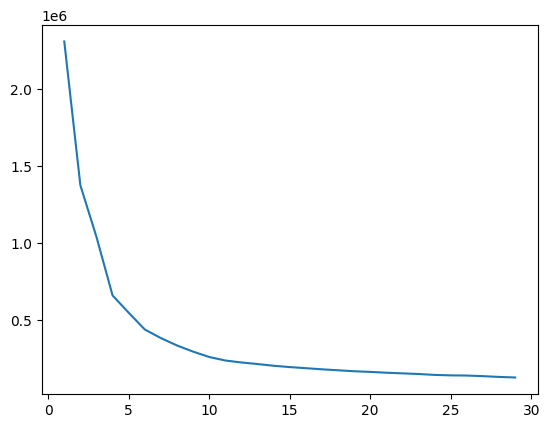

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Perform k-means clustering, and select the best k by using the elbow method.
inertias = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0).fit(df)
    inertias.append(kmeans.inertia_)
plt.plot(range(1, 30), inertias)

In [37]:
# Select k=10, as the elbow is at k=10.
kmeans = KMeans(n_clusters=10, n_init='auto', random_state=0).fit(df)
df['cluster'] = kmeans.labels_

In [43]:
df[df['cluster'] == 0]

cam_angle color_entropy age_gender_race                   \
           cam_angle color_entropy   AdultFemaleAA AdultFemaleAsian   
image                                                                 
88.jpg     -4.130863     22.748590             0.0              0.0   
100.jpg    -5.971774     22.688793             0.0              0.0   
133.jpg    -7.385656     22.774910             0.0              0.0   
218.jpg   -25.784971     20.899380             0.0              0.0   
222.jpg    -4.465215     22.289991             0.0              0.0   
...              ...           ...             ...              ...   
10922.jpg  -7.556215     21.128230             0.0              0.0   
10970.jpg  -3.450455     19.947239             0.0              0.0   
10980.jpg -12.011224     22.820404             0.0              0.0   
10988.jpg  -8.495928     21.458725             0.0              0.0   
11042.jpg  -9.495693     22.479517             0.0              0.0   

                                                                      \
          AdultFemaleLat AdultFemaleWhite AdultMaleAA AdultMaleAsian   
image                                                                  
88.jpg               0.0              0.0         0.0            0.0   
100.jpg              0.0              0.0         0.0            0.0   
133.jpg              0.0              0.0         0.0            1.0   
218.jpg              0.0              0.0         0.0            0.0   
222.jpg              0.0              0.0         0.0            0.0   
...                  ...              ...         ...            ...   
10922.jpg            0.0              0.0         0.0            0.0   
10970.jpg            0.0              0.0         0.0            0.0   
10980.jpg            0.0              0.0         0.0            0.0   
10988.jpg            0.0              0.0         0.0            0.0   
11042.jpg            0.0              0.0         0.0            0.0   

                                       ... num_eye_contact expression  \
          AdultMaleLat AdultMaleWhite  ... num_eye_contact      angry   
image                                  ...                              
88.jpg             0.0            0.0  ...               1        0.0   
100.jpg            0.0            0.0  ...               0        0.0   
133.jpg            0.0            0.0  ...               0        0.0   
218.jpg            0.0            0.0  ...               0        0.0   
222.jpg            0.0            0.0  ...               1        0.0   
...                ...            ...  ...             ...        ...   
10922.jpg          0.0            0.0  ...               1        1.0   
10970.jpg          0.0            0.0  ...               0        0.0   
10980.jpg          0.0            0.0  ...               1        0.0   
10988.jpg          0.0            0.0  ...               0        0.0   
11042.jpg          0.0            0.0  ...               1        0.0   

                                                    num_people num_police  \
          disappointed happy neutral  sad surprised num_people num_police   
image                                                                       
88.jpg             0.0   0.0     0.0  0.0       0.0          2          4   
100.jpg            0.0   0.0     1.0  0.0       0.0          1          5   
133.jpg            0.0   0.0     1.0  0.0       0.0          4          6   
218.jpg            0.0   0.0     0.0  0.0       0.0          4          7   
222.jpg            0.0   0.0     0.0  0.0       0.0          1          9   
...                ...   ...     ...  ...       ...        ...        ...   
10922.jpg          0.0   0.0     1.0  0.0       0.0          4          7   
10970.jpg          0.0   0.0     0.0  0.0       0.0          2          3   
10980.jpg          0.0   0.0     1.0  0.0       0.0          2          4   
10988.jpg          0.0   0.0     0.0  0.0       0.0         

In [66]:
# save the results
df.to_csv('all_predictions_with_clusters.csv')